# **Importing Libraries**

In [1]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import get_scorer

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from scipy import stats
import pandas as pd
import os
import time


In [2]:
np.random.seed(1)

# **Plotting Functions**

In [72]:
def plot_metric(base_data, ensemble_data,title, metric):
    plt.plot(base_data, label="base model")
    plt.plot(ensemble_data, label = "ensemble")
    plt.legend()
    plt.title(title, size=15)
    plt.xlabel("Epoch", size=15)
    plt.ylabel(metric, size=15)
    plt.show()

In [63]:
def plot_many_graphs_1(base_data, ensemble_data,all_estimators_data, title, metric, epoch):
    plt.plot(base_data, label="base model", linewidth=2)
    plt.plot(ensemble_data, label = "ensemble", linewidth=2)
    minimum= -100
    if len(all_estimators_data[0]) > 0:
        for i in range(len(all_estimators_data)):
            plt.plot(all_estimators_data[i][:epoch],'--', label = "estimator "+str(i), alpha=0.3)
            minimum_loss = np.min(all_estimators_data[i][:epoch])
            if minimum_loss < minimum:
                minimum = minimum_loss
    plt.legend()
    plt.title(title, size=15)
    plt.xlabel("Epoch", size=15)
    plt.ylabel(metric, size=15)
    if metric == "R2":
        plt.ylim([max(-1,minimum), 1])
    plt.show()

In [69]:
def plot_many_graphs_2(base_data, ensemble_data,all_estimators_data, title, metric, epoch):
    plt.plot(base_data, label="base model", linewidth=2)
    plt.plot(ensemble_data, label = "ensemble", linewidth=2)
    if len(all_estimators_data[0]) > 0:
        for i in range(len(all_estimators_data)):
            plt.plot(all_estimators_data[i][epoch:],'--', label = "estimator "+str(i), alpha=0.3)
    plt.legend()
    plt.title(title, size=15)
    plt.xlabel("Epoch", size=15)
    plt.ylabel(metric, size=15)
    plt.show()

# **Data Class**

In [3]:
class arff_data():
  def __init__(self, file_path):
    self.data = arff.loadarff(file_path)
    self.df = pd.DataFrame(self.data[0])
    self.y = self.df.iloc[: , -1:].values
    self.features = self.df.iloc[: , :-1].values

  def number_of_features(self):
    return (len(self.df.columns)-1) 
  
  def df_train_test_split(self, test_size):
    return  train_test_split(self.features,self.y,random_state=1, test_size= test_size)


# **Hyper Params Optimization**

In [4]:
all_data_paths = os.listdir("data")
all_data_paths.sort()
all_data_paths
all_data = [{"name": path,
            "class":  arff_data("data/" + path) } for path in all_data_paths if path.endswith(".arff")]


In [5]:
EPOCH = 200
BATCH_SIZE = [32, 64, 128, 256]
LEARNING_RATE = [0.01, 0.001]
VALIDATION_FRACTION= 0.1

In [17]:
all_results = []
for data in all_data:
    data_result = []
    NURON_SIZE = data["class"].number_of_features() // 2
    X_train, X_test, y_train, y_test = data["class"].df_train_test_split(0.2)
    print("Data: ", data["name"])
    for batch_size in BATCH_SIZE:
        for learning_rate in LEARNING_RATE:
            mlp = MLPRegressor(hidden_layer_sizes=(NURON_SIZE,), max_iter=EPOCH, batch_size=batch_size, learning_rate_init=learning_rate,\
                 validation_fraction=VALIDATION_FRACTION, activation='relu', solver= 'adam', n_iter_no_change= 5, early_stopping=True, random_state=1)
            start= time.time()
            mlp.fit(X_train, y_train.ravel())
            data_result.append({"name": data["name"], "Epoch": mlp.n_iter_ - mlp.n_iter_no_change, "batch_size": batch_size, "learning_rate": learning_rate, "test_score": mlp.score(X_test, y_test),"time": time.time() - start})
            print("Epoch: ", mlp.n_iter_ - mlp.n_iter_no_change, "BATCH_SIZE: ", batch_size,  "Learning Rate: ", learning_rate, "Score: ", mlp.score(X_test, y_test), "time:", time.time() - start)
    all_results.append(data_result)

Data:  2dplanes.arff
Epoch:  4 BATCH_SIZE:  32 Learning Rate:  0.01 Score:  0.9463550564982353 time: 1.6111772060394287
Epoch:  21 BATCH_SIZE:  32 Learning Rate:  0.001 Score:  0.9486099567005694 time: 3.594740867614746
Epoch:  13 BATCH_SIZE:  64 Learning Rate:  0.01 Score:  0.9473404093704929 time: 1.2849962711334229
Epoch:  32 BATCH_SIZE:  64 Learning Rate:  0.001 Score:  0.9489387893787748 time: 2.63280987739563
Epoch:  13 BATCH_SIZE:  128 Learning Rate:  0.01 Score:  0.947541095874989 time: 0.7131068706512451
Epoch:  41 BATCH_SIZE:  128 Learning Rate:  0.001 Score:  0.9489108528673508 time: 1.851370096206665
Epoch:  18 BATCH_SIZE:  256 Learning Rate:  0.01 Score:  0.9485923440255205 time: 0.5875260829925537
Epoch:  71 BATCH_SIZE:  256 Learning Rate:  0.001 Score:  0.9488763508535325 time: 2.55704402923584
Data:  abalone.arff
Epoch:  33 BATCH_SIZE:  32 Learning Rate:  0.01 Score:  0.5116524123798967 time: 0.6679859161376953
Epoch:  72 BATCH_SIZE:  32 Learning Rate:  0.001 Score:  0.

/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch:  195 BATCH_SIZE:  128 Learning Rate:  0.001 Score:  0.46448969191863154 time: 0.8771991729736328
Epoch:  144 BATCH_SIZE:  256 Learning Rate:  0.01 Score:  0.5061885869118112 time: 0.4612412452697754


/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch:  195 BATCH_SIZE:  256 Learning Rate:  0.001 Score:  0.3644165706604051 time: 0.53839111328125
Data:  ailerons.arff
Epoch:  6 BATCH_SIZE:  32 Learning Rate:  0.01 Score:  0.8058347284620113 time: 0.6669008731842041
Epoch:  29 BATCH_SIZE:  32 Learning Rate:  0.001 Score:  0.8185709183028136 time: 2.2401490211486816
Epoch:  8 BATCH_SIZE:  64 Learning Rate:  0.01 Score:  0.8104896799355137 time: 0.44536328315734863
Epoch:  34 BATCH_SIZE:  64 Learning Rate:  0.001 Score:  0.817521948202135 time: 1.2603421211242676
Epoch:  19 BATCH_SIZE:  128 Learning Rate:  0.01 Score:  0.8091908395455706 time: 0.4818098545074463
Epoch:  59 BATCH_SIZE:  128 Learning Rate:  0.001 Score:  0.813614151314348 time: 1.324894905090332
Epoch:  37 BATCH_SIZE:  256 Learning Rate:  0.01 Score:  0.8075651096802281 time: 0.559962272644043
Epoch:  44 BATCH_SIZE:  256 Learning Rate:  0.001 Score:  0.8069981269996935 time: 0.6504731178283691
Data:  autoHorse.arff
Epoch:  20 BATCH_SIZE:  32 Learning Rate:  0.01 Score

/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch:  46 BATCH_SIZE:  32 Learning Rate:  0.01 Score:  0.8580901139614292 time: 0.12670111656188965
Epoch:  155 BATCH_SIZE:  32 Learning Rate:  0.001 Score:  0.8646078062554603 time: 0.31074094772338867
Epoch:  22 BATCH_SIZE:  64 Learning Rate:  0.01 Score:  0.7755516144683658 time: 0.03635001182556152


/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch:  195 BATCH_SIZE:  64 Learning Rate:  0.001 Score:  0.8360942721015017 time: 0.27829408645629883
Epoch:  31 BATCH_SIZE:  128 Learning Rate:  0.01 Score:  0.760633761299791 time: 0.034958839416503906
Epoch:  129 BATCH_SIZE:  128 Learning Rate:  0.001 Score:  0.6547950455626967 time: 0.1387162208557129
Epoch:  43 BATCH_SIZE:  256 Learning Rate:  0.01 Score:  0.7542368592101759 time: 0.04493403434753418
Epoch:  129 BATCH_SIZE:  256 Learning Rate:  0.001 Score:  0.4758758087424295 time: 0.10164499282836914
Data:  auto_price.arff
Epoch:  72 BATCH_SIZE:  32 Learning Rate:  0.01 Score:  0.8046881445433051 time: 0.08170390129089355
Epoch:  6 BATCH_SIZE:  32 Learning Rate:  0.001 Score:  -1.8589136272575826 time: 0.011425018310546875
Epoch:  23 BATCH_SIZE:  64 Learning Rate:  0.01 Score:  0.19789184839813612 time: 0.024703025817871094
Epoch:  10 BATCH_SIZE:  64 Learning Rate:  0.001 Score:  -2.2107686633132553 time: 0.012367963790893555
Epoch:  3 BATCH_SIZE:  128 Learning Rate:  0.01 Scor

/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages

Epoch:  15 BATCH_SIZE:  32 Learning Rate:  0.01 Score:  0.5929863852022077 time: 0.663276195526123
Epoch:  26 BATCH_SIZE:  32 Learning Rate:  0.001 Score:  0.5791869470556226 time: 1.2243750095367432
Epoch:  18 BATCH_SIZE:  64 Learning Rate:  0.01 Score:  0.5892091069258234 time: 0.42468929290771484
Epoch:  38 BATCH_SIZE:  64 Learning Rate:  0.001 Score:  0.5791560450228652 time: 0.7563989162445068
Epoch:  24 BATCH_SIZE:  128 Learning Rate:  0.01 Score:  0.5879365704660009 time: 0.3277769088745117
Epoch:  57 BATCH_SIZE:  128 Learning Rate:  0.001 Score:  0.5789035051308062 time: 0.6779110431671143
Epoch:  17 BATCH_SIZE:  256 Learning Rate:  0.01 Score:  0.567852632102898 time: 0.15537810325622559
Epoch:  73 BATCH_SIZE:  256 Learning Rate:  0.001 Score:  0.5712349829416331 time: 0.6144580841064453
Data:  bank8FM.arff
Epoch:  20 BATCH_SIZE:  32 Learning Rate:  0.01 Score:  0.9461034119094375 time: 0.8060269355773926
Epoch:  35 BATCH_SIZE:  32 Learning Rate:  0.001 Score:  0.9453230749064

/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch:  195 BATCH_SIZE:  256 Learning Rate:  0.001 Score:  0.9475571360409538 time: 1.1060538291931152
Data:  elevators.arff
Epoch:  22 BATCH_SIZE:  32 Learning Rate:  0.01 Score:  0.8839784072930508 time: 1.879755973815918
Epoch:  37 BATCH_SIZE:  32 Learning Rate:  0.001 Score:  0.8676936078931754 time: 3.1464619636535645
Epoch:  37 BATCH_SIZE:  64 Learning Rate:  0.01 Score:  0.8883344244141619 time: 1.4495689868927002
Epoch:  40 BATCH_SIZE:  64 Learning Rate:  0.001 Score:  0.8544699762426768 time: 1.4944789409637451
Epoch:  57 BATCH_SIZE:  128 Learning Rate:  0.01 Score:  0.8810584529886477 time: 1.089629888534546
Epoch:  68 BATCH_SIZE:  128 Learning Rate:  0.001 Score:  0.8508403053568162 time: 1.2434179782867432
Epoch:  58 BATCH_SIZE:  256 Learning Rate:  0.01 Score:  0.8527599986742255 time: 0.6951301097869873
Epoch:  127 BATCH_SIZE:  256 Learning Rate:  0.001 Score:  0.853858330788044 time: 1.4383468627929688
Data:  housing.arff
Epoch:  17 BATCH_SIZE:  32 Learning Rate:  0.01 S

/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayenebech/Desktop/rayene/ytu/fall_2022/Ensemble Learning/HW2022/HW1/clean_codes/hw_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Setting the best found hyper pararmas** 

In [4]:
all_data = [{"name": "2dplanes.arff",
            "path": "data/2dplanes.arff",
            "class":  arff_data("data/2dplanes.arff"),
            "Epoch": 41,
            "batch_size": 128,
            "learning_rate": 0.001},

            {"name": "abalone.arff",
            "path": "data/abalone.arff",
            "class":  arff_data("data/abalone.arff"),
            "Epoch": 33,
            "batch_size": 32,
            "learning_rate": 0.01},

            {"name": "ailerons.arff",
            "path": "data/ailerons.arff",
            "class":  arff_data("data/ailerons.arff"),
            "Epoch": 8,
            "batch_size": 64,
            "learning_rate": 0.01},

            {"name": "autoHorse.arff ",
            "path": "data/autoHorse.arff ",
            "class":  arff_data("data/autoHorse.arff"),
            "Epoch": 20,
            "batch_size": 32,
            "learning_rate": 0.01},

            {"name": "autoMpg.arff",
            "path": "data/autoMpg.arff",
            "class":  arff_data("data/autoMpg.arff"),
            "Epoch": 46,
            "batch_size": 32,
            "learning_rate": 0.01},

            {"name": "auto_price.arff",
            "path": "data/auto_price.arff",
            "class":  arff_data("data/auto_price.arff"),
            "Epoch": 72,
            "batch_size": 32,
            "learning_rate": 0.01},

            {"name": "bank32nh.arff",
            "path": "data/bank32nh.arff",
            "class":  arff_data("data/bank32nh.arff"),
            "Epoch": 15,
            "batch_size": 32,
            "learning_rate": 0.01},

            {"name": "bank8FM.arff",
            "path": "data/bank8FM.arff",
            "class":  arff_data("data/bank8FM.arff"),
            "Epoch": 135,
            "batch_size": 128,
            "learning_rate": 0.001},

            {"name": "elevators.arff",
            "path": "data/elevators.arff",
            "class":  arff_data("data/elevators.arff"),
            "Epoch": 37,
            "batch_size": 64,
            "learning_rate": 0.01},

            {"name": "housing.arff",
            "path": "data/housing.arff",
            "class":  arff_data("data/housing.arff"),
            "Epoch": 32,
            "batch_size": 64,
            "learning_rate": 0.01},
            ]

    

# **T-test Function**

In [5]:
def customized_paired_ttest_5x2cv(estimator1, estimator2, X, y, scoring, random_seed=None):
    """
    Partially borrowed from
    http://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_5x2cv/
    """
    rng = np.random.RandomState(random_seed)
    scorer = get_scorer(scoring)
    variance_sum = 0.0
    first_diff = None
    n_win = 0
    n_loss = 0
    est_1_scores = []
    est_2_scores = []


    def update_wining_params(score_diff_value, n_win, n_loss):
      if score_diff_value < 0:
          n_win = n_win + 1
      elif score_diff_value > 0:
          n_loss = n_loss + 1
      return n_win, n_loss

    def score_diff(X_1, X_2, y_1, y_2):
        estimator1.fit(X_1, y_1.ravel())
        estimator2.fit(X_1, y_1.ravel())
        est1_score = -scorer(estimator1, X_2, y_2)
        est2_score = -scorer(estimator2, X_2, y_2)
        est_1_scores.append(est1_score)
        est_2_scores.append(est2_score)
        score_diff_value = est1_score - est2_score
        return score_diff_value 

    for i in range(5):

        randint = rng.randint(low=0, high=32767)
        X_1, X_2, y_1, y_2 = train_test_split(X, y, test_size=0.5, random_state=randint)

        score_diff_1 = score_diff(X_1, X_2, y_1, y_2)
        n_win, n_loss = update_wining_params(score_diff_1, n_win, n_loss)
        score_diff_2 = score_diff(X_2, X_1, y_2, y_1)
        n_win, n_loss = update_wining_params(score_diff_2, n_win, n_loss)
        score_mean = (score_diff_1 + score_diff_2) / 2.0
        score_var = (score_diff_1 - score_mean) ** 2 + (score_diff_2 - score_mean) ** 2
        variance_sum += score_var
        if first_diff is None:
            first_diff = score_diff_1

    numerator = first_diff
    denominator = np.sqrt(1 / 5.0 * variance_sum)
    t_stat = numerator / denominator

    pvalue = stats.t.sf(np.abs(t_stat), 5) * 2.0
    return float(t_stat), float(pvalue),  n_win, n_loss, est_1_scores, est_2_scores

# **Compare Bagging to Base NN**

In [ ]:
t_test_results = []
for data in all_data:
    NEURONS = data["class"].number_of_features() // 2
    mlp = MLPRegressor(hidden_layer_sizes=(NEURONS,),
                       max_iter= data["Epoch"],
                       batch_size= data["batch_size"],
                       learning_rate_init= data["learning_rate"],
                       validation_fraction= 0.2,
                       activation='relu', 
                       solver= 'adam', 
                       early_stopping=False, 
                       random_state=1)
    bagging_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=True, random_state=1, verbose=0)
    t_stat, pvalue, n_win, n_loss, ensemble_loss, base_loss = customized_paired_ttest_5x2cv(bagging_ensemble, mlp, data["class"].features, data["class"].y, "neg_mean_squared_error", random_seed=1)    
    t_test_results.append({"name": data["name"], "t_stat": t_stat, "pvalue": pvalue, "n_win": n_win, "n_loss": n_loss, "ensemble_loss": ensemble_loss, "base_loss": base_loss})
    print("data", data["name"] ,"t_stat: ", t_stat, "pvalue: ", pvalue, "n_win: ", n_win, "n_loss: ", n_loss, "ensemble_loss_mean: ", np.mean(ensemble_loss), "base_loss_mean: ", np.mean(base_loss))

# **Random Subspace VS Base NN**

In [ ]:
t_test_results_4 = []
for data in all_data:
    NEURONS = data["class"].number_of_features() // 2
    mlp = MLPRegressor(hidden_layer_sizes=(NEURONS,),
                       max_iter= data["Epoch"],
                       batch_size= data["batch_size"],
                       learning_rate_init= data["learning_rate"],
                       validation_fraction= 0.2,
                       activation='relu', 
                       solver= 'adam', 
                       early_stopping=True, 
                       n_iter_no_change= 5,
                       random_state=1)
    random_subspace_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=False, max_features= round(data["class"].number_of_features()*0.7), random_state=1, verbose=0)
    t_stat, pvalue, n_win, n_loss, ensemble_loss, base_loss = customized_paired_ttest_5x2cv(random_subspace_ensemble, mlp, data["class"].features, data["class"].y, "neg_mean_squared_error", random_seed=1)    
    t_test_results_4.append({"name": data["name"], "t_stat": t_stat, "pvalue": pvalue, "n_win": n_win, "n_loss": n_loss, "ensemble_loss": ensemble_loss, "base_loss": base_loss})
    print("data", data["name"] ,"t_stat: ", t_stat, "pvalue: ", pvalue, "n_win: ", n_win, "n_loss: ", n_loss, "ensemble_loss_mean: ", np.mean(ensemble_loss), "base_loss_mean: ", np.mean(base_loss))

# **AdaBoost Vs Base NN**

In [ ]:
t_test_results_5 = []
for data in all_data:
    NEURONS = data["class"].number_of_features() // 2
    mlp = MLPRegressor(hidden_layer_sizes=(NEURONS,),
                       max_iter= data["Epoch"],
                       batch_size= data["batch_size"],
                       learning_rate_init= data["learning_rate"],
                       validation_fraction= 0.2,
                       activation='relu', 
                       solver= 'adam', 
                       early_stopping=True, 
                       n_iter_no_change= 5,
                       random_state=1)
    adaboost_ensmeble = AdaBoostRegressor(base_estimator=mlp, n_estimators=10, random_state=1)
    t_stat, pvalue, n_win, n_loss, ensemble_loss, base_loss = customized_paired_ttest_5x2cv(adaboost_ensmeble, mlp, data["class"].features, data["class"].y, "neg_mean_squared_error", random_seed=1)    
    t_test_results_5.append({"name": data["name"], "t_stat": t_stat, "pvalue": pvalue, "n_win": n_win, "n_loss": n_loss, "ensemble_loss": ensemble_loss, "base_loss": base_loss})
    print("data", data["name"] ,"t_stat: ", t_stat, "pvalue: ", pvalue, "n_win: ", n_win, "n_loss: ", n_loss, "ensemble_loss_mean: ", np.mean(ensemble_loss), "base_loss_mean: ", np.mean(base_loss))

# **Boosting Vs Bagging**

In [ ]:
t_test_results_6 = []
for data in all_data:
    NEURONS = data["class"].number_of_features() // 2
    mlp = MLPRegressor(hidden_layer_sizes=(NEURONS,),
                       max_iter= data["Epoch"],
                       batch_size= data["batch_size"],
                       learning_rate_init= data["learning_rate"],
                       validation_fraction= 0.2,
                       activation='relu', 
                       solver= 'adam', 
                       early_stopping=True, 
                       n_iter_no_change= 5,
                       random_state=1)
    adaboost_ensmeble = AdaBoostRegressor(base_estimator=mlp, n_estimators=10, random_state=1)
    bagging_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=True, random_state=1, verbose=0)
    t_stat, pvalue, n_win, n_loss, adaboost_loss, bagging_loss = customized_paired_ttest_5x2cv(adaboost_ensmeble, bagging_ensemble, data["class"].features, data["class"].y, "neg_mean_squared_error", random_seed=1)    
    t_test_results_6.append({"name": data["name"], "t_stat": t_stat, "pvalue": pvalue, "n_win": n_win, "n_loss": n_loss, "adaboost": adaboost_loss, "bagging": bagging_loss})
    print("data", data["name"] ,"t_stat: ", t_stat, "pvalue: ", pvalue, "n_win: ", n_win, "n_loss: ", n_loss, "adaboost_loss_mean: ", np.mean(adaboost_loss), "bagging_loss_mean: ", np.mean(bagging_loss))

# **Boosting Vs Random Subspace**

In [ ]:
t_test_results_7 = []
for data in all_data:
    NEURONS = data["class"].number_of_features() // 2
    mlp = MLPRegressor(hidden_layer_sizes=(NEURONS,),
                       max_iter= data["Epoch"],
                       batch_size= data["batch_size"],
                       learning_rate_init= data["learning_rate"],
                       validation_fraction= 0.2,
                       activation='relu', 
                       solver= 'adam', 
                       early_stopping=True, 
                       n_iter_no_change= 5,
                       random_state=1)
    random_subspace_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=False, max_features= round(data["class"].number_of_features()*0.7), random_state=1, verbose=0)
    adaboost_ensmeble = AdaBoostRegressor(base_estimator=mlp, n_estimators=10, random_state=1)
    t_stat, pvalue, n_win, n_loss, adaboost_loss, random_subspace_loss = customized_paired_ttest_5x2cv(adaboost_ensmeble, random_subspace_ensemble, data["class"].features, data["class"].y, "neg_mean_squared_error", random_seed=1)    
    t_test_results_7.append({"name": data["name"], "t_stat": t_stat, "pvalue": pvalue, "n_win": n_win, "n_loss": n_loss, "adaboost": adaboost_loss, "random_subspace": random_subspace_loss})
    print("data", data["name"] ,"t_stat: ", t_stat, "pvalue: ", pvalue, "n_win: ", n_win, "n_loss: ", n_loss, "adaboost_loss_mean: ", np.mean(adaboost_loss), "random_subspace_loss_mean: ", np.mean(random_subspace_loss))

# **Bagging Vs Random Subspace**

In [ ]:
t_test_results_8 = []
for data in all_data:
    NEURONS = data["class"].number_of_features() // 2
    mlp = MLPRegressor(hidden_layer_sizes=(NEURONS,),
                       max_iter= data["Epoch"],
                       batch_size= data["batch_size"],
                       learning_rate_init= data["learning_rate"],
                       validation_fraction= 0.2,
                       activation='relu', 
                       solver= 'adam', 
                       early_stopping=True, 
                       n_iter_no_change= 5,
                       random_state=1)
    random_subspace_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=False, max_features= round(data["class"].number_of_features()*0.7), random_state=1, verbose=0)
    bagging_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=True, random_state=1, verbose=0)
    t_stat, pvalue, n_win, n_loss, bagging_loss, random_subspace_loss = customized_paired_ttest_5x2cv(bagging_ensemble, random_subspace_ensemble, data["class"].features, data["class"].y, "neg_mean_squared_error", random_seed=1)    
    t_test_results_8.append({"name": data["name"], "t_stat": t_stat, "pvalue": pvalue, "n_win": n_win, "n_loss": n_loss, "bagging": bagging_loss, "random_subspace": random_subspace_loss})
    print("data", data["name"] ,"t_stat: ", t_stat, "pvalue: ", pvalue, "n_win: ", n_win, "n_loss: ", n_loss, "bagging_loss_mean: ", np.mean(bagging_loss), "random_subspace_loss_mean: ", np.mean(random_subspace_loss))

# **Pasting Vs NN**

In [ ]:
t_test_results_10 = []
for data in all_data:
    NEURONS = data["class"].number_of_features() // 2
    mlp = MLPRegressor(hidden_layer_sizes=(NEURONS,),
                       max_iter= data["Epoch"],
                       batch_size= data["batch_size"],
                       learning_rate_init= data["learning_rate"],
                       validation_fraction= 0.2,
                       activation='relu', 
                       solver= 'adam', 
                       early_stopping=False, 
                       random_state=1)
    pasting_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=False, random_state=1, verbose=0)
    t_stat, pvalue, n_win, n_loss, pasting_loss, base_loss = customized_paired_ttest_5x2cv(pasting_ensemble, mlp, data["class"].features, data["class"].y, "neg_mean_squared_error", random_seed=1)    
    t_test_results_10.append({"name": data["name"], "t_stat": t_stat, "pvalue": pvalue, "n_win": n_win, "n_loss": n_loss, "pasting_loss": pasting_loss, "base_loss": base_loss})
    print("data", data["name"] ,"t_stat: ", t_stat, "pvalue: ", pvalue, "n_win: ", n_win, "n_loss: ", n_loss, "pasting_loss_mean: ", np.mean(pasting_loss), "base_loss_mean: ", np.mean(base_loss))

# **Pasting Vs Random Subspace**

In [ ]:
t_test_results_11 = []
for data in all_data:
    NEURONS = data["class"].number_of_features() // 2
    mlp = MLPRegressor(hidden_layer_sizes=(NEURONS,),
                       max_iter= data["Epoch"],
                       batch_size= data["batch_size"],
                       learning_rate_init= data["learning_rate"],
                       validation_fraction= 0.2,
                       activation='relu', 
                       solver= 'adam', 
                       early_stopping=True, 
                       n_iter_no_change= 5,
                       random_state=1)
    random_subspace_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=False, max_features= round(data["class"].number_of_features()*0.7), random_state=1, verbose=0)
    pasting_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=False, random_state=1, verbose=0)
    t_stat, pvalue, n_win, n_loss, pasting_loss, random_subspace_loss = customized_paired_ttest_5x2cv(pasting_ensemble, random_subspace_ensemble, data["class"].features, data["class"].y, "neg_mean_squared_error", random_seed=1)    
    t_test_results_11.append({"name": data["name"], "t_stat": t_stat, "pvalue": pvalue, "n_win": n_win, "n_loss": n_loss, "pasting": pasting_loss, "random_subspace": random_subspace_loss})
    print("data", data["name"] ,"t_stat: ", t_stat, "pvalue: ", pvalue, "n_win: ", n_win, "n_loss: ", n_loss, "pasting_loss_mean: ", np.mean(pasting_loss), "random_subspace_loss_mean: ", np.mean(random_subspace_loss))

# **Pasting Vs Bagging**

In [ ]:
t_test_results_12 = []
for data in all_data:
    NEURONS = data["class"].number_of_features() // 2
    mlp = MLPRegressor(hidden_layer_sizes=(NEURONS,),
                       max_iter= data["Epoch"],
                       batch_size= data["batch_size"],
                       learning_rate_init= data["learning_rate"],
                       validation_fraction= 0.2,
                       activation='relu', 
                       solver= 'adam', 
                       early_stopping=True, 
                       n_iter_no_change= 5,
                       random_state=1)
    bagging_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=True, random_state=1, verbose=0)
    pasting_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=False, random_state=1, verbose=0)
    t_stat, pvalue, n_win, n_loss, pasting_loss, bagging_loss = customized_paired_ttest_5x2cv(pasting_ensemble, bagging_ensemble, data["class"].features, data["class"].y, "neg_mean_squared_error", random_seed=1)    
    t_test_results_12.append({"name": data["name"], "t_stat": t_stat, "pvalue": pvalue, "n_win": n_win, "n_loss": n_loss, "pasting": pasting_loss, "bagging": bagging_loss})
    print("data", data["name"] ,"t_stat: ", t_stat, "pvalue: ", pvalue, "n_win: ", n_win, "n_loss: ", n_loss, "pasting_loss_mean: ", np.mean(pasting_loss), "bagging_loss_mean: ", np.mean(bagging_loss))

# **Pasting Vs AdaBoost**

In [ ]:
t_test_results_6 = []
for data in all_data:
    NEURONS = data["class"].number_of_features() // 2
    mlp = MLPRegressor(hidden_layer_sizes=(NEURONS,),
                       max_iter= data["Epoch"],
                       batch_size= data["batch_size"],
                       learning_rate_init= data["learning_rate"],
                       validation_fraction= 0.2,
                       activation='relu', 
                       solver= 'adam', 
                       early_stopping=True, 
                       n_iter_no_change= 5,
                       random_state=1)
    adaboost_ensmeble = AdaBoostRegressor(base_estimator=mlp, n_estimators=10, random_state=1)
    pasting_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=False, random_state=1, verbose=0)
    t_stat, pvalue, n_win, n_loss, pasting_loss, adaboost_loss = customized_paired_ttest_5x2cv(pasting_ensemble, adaboost_ensmeble, data["class"].features, data["class"].y, "neg_mean_squared_error", random_seed=1)    
    t_test_results_6.append({"name": data["name"], "t_stat": t_stat, "pvalue": pvalue, "n_win": n_win, "n_loss": n_loss, "pasting": pasting_loss, "adaboost": adaboost_loss})
    print("data", data["name"] ,"t_stat: ", t_stat, "pvalue: ", pvalue, "n_win: ", n_win, "n_loss: ", n_loss, "pasting_loss_mean: ", np.mean(pasting_loss), "adaboost_loss_mean: ", np.mean(adaboost_loss))

# **Epoch Vs Test-Loss For t-test**

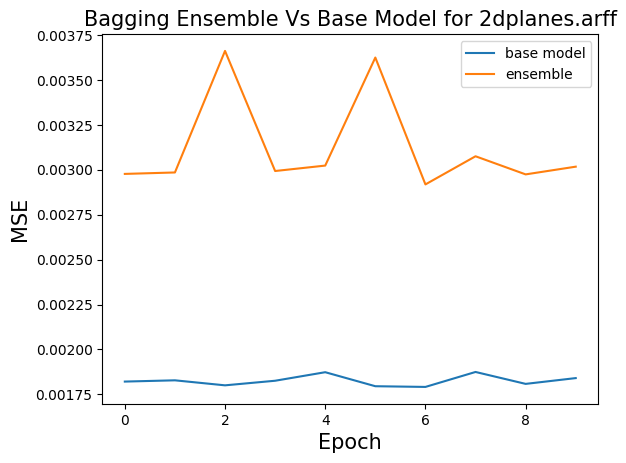

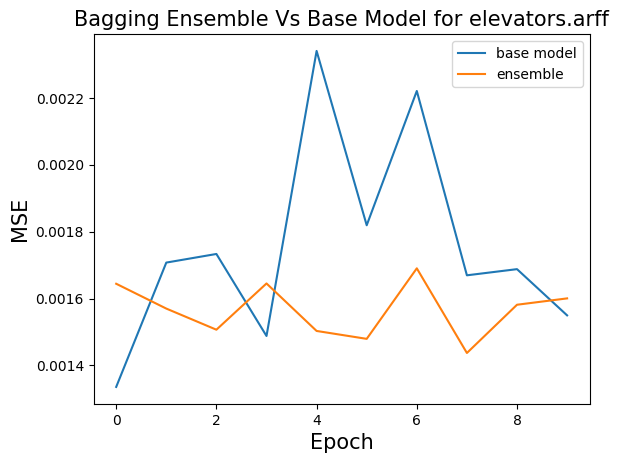

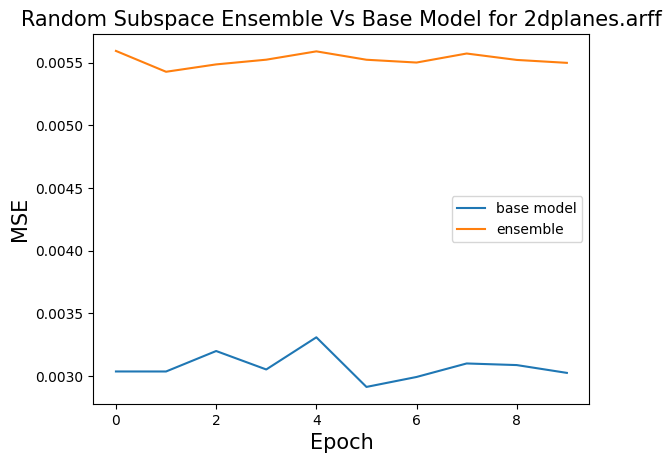

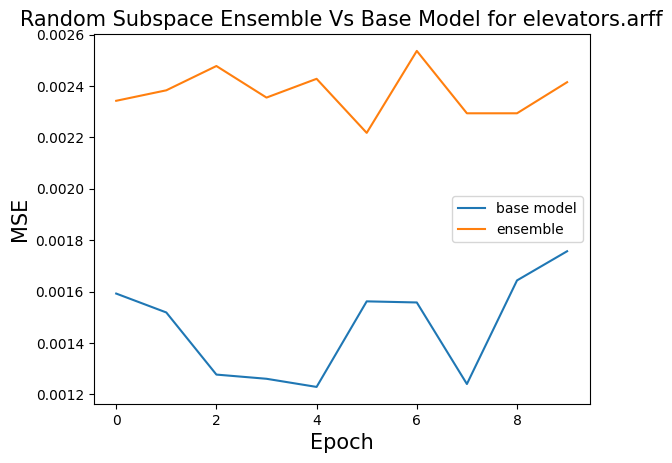

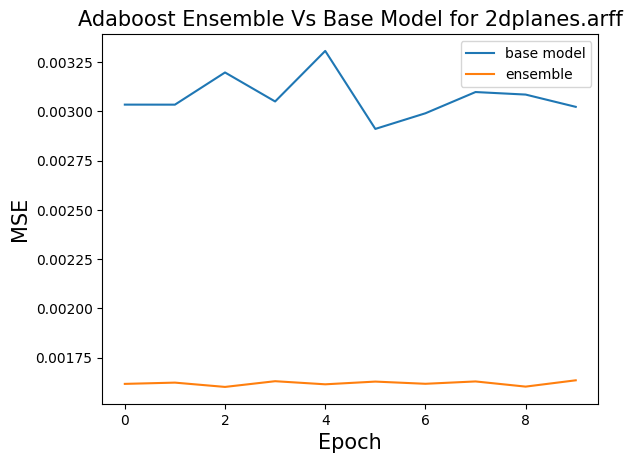

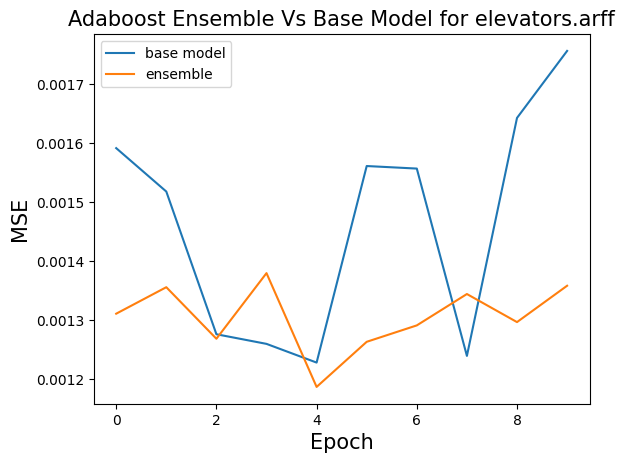

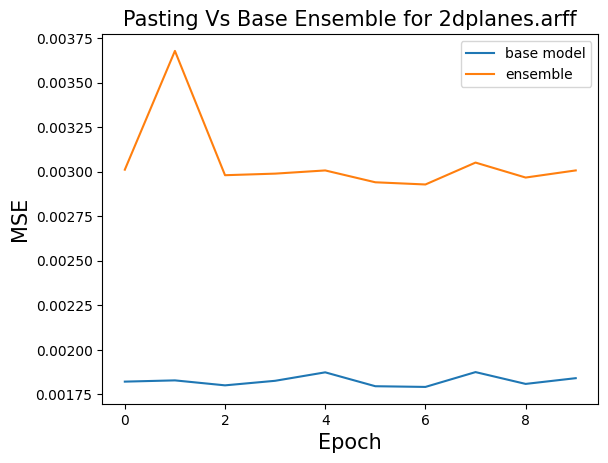

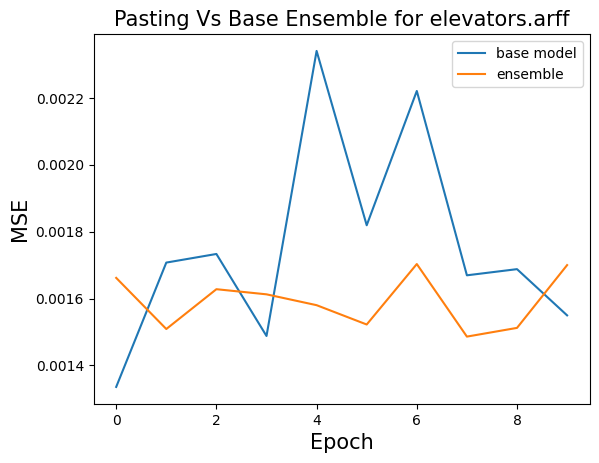

In [82]:

plot_metric(t_test_results[0]["base_loss"], t_test_results[0]["ensemble_loss"], f"Bagging Ensemble Vs Base Model for {t_test_results[0]['name']}", "MSE")
plot_metric(t_test_results[8]["base_loss"], t_test_results[8]["ensemble_loss"], f"Bagging Ensemble Vs Base Model for {t_test_results[8]['name']}", "MSE")

plot_metric(t_test_results_4[0]["base_loss"], t_test_results_4[0]["ensemble_loss"], f"Random Subspace Ensemble Vs Base Model for {t_test_results[0]['name']}", "MSE")
plot_metric(t_test_results_4[8]["base_loss"], t_test_results_4[8]["ensemble_loss"], f"Random Subspace Ensemble Vs Base Model for {t_test_results[8]['name']}", "MSE")

plot_metric(t_test_results_5[0]["base_loss"], t_test_results_5[0]["ensemble_loss"], f"Adaboost Ensemble Vs Base Model for {t_test_results[0]['name']}", "MSE")
plot_metric(t_test_results_5[8]["base_loss"], t_test_results_5[8]["ensemble_loss"], f"Adaboost Ensemble Vs Base Model for {t_test_results[8]['name']}", "MSE")

plot_metric(t_test_results_10[0]["base_loss"], t_test_results_10[0]["pasting_loss"], f"Pasting Vs Base Ensemble for {t_test_results[0]['name']}", "MSE")
plot_metric(t_test_results_10[8]["base_loss"], t_test_results_10[8]["pasting_loss"], f"Pasting Vs Base Ensemble for {t_test_results[8]['name']}", "MSE")



# **Epoch Vs Loss All Graphs**

In [6]:
data_1 = all_data[0]
data_2 = all_data[8]
NEURON_SIZE_1 = data_1["class"].number_of_features() // 2
NEURON_SIZE_2 = data_2["class"].number_of_features() // 2

In [10]:
def init_estimators_loss(number_of_estimators):
    all_estimators_loss = []
    all_estimators_score = []
    for i in range(number_of_estimators):
        all_estimators_loss.append([])
        all_estimators_score.append([])
    return all_estimators_loss, all_estimators_score

In [11]:
def get_loss_score_for_each_estimator(ensemble_model, x_test, y_test, scorer, all_estimators_loss, all_estimators_score):
    for i, estimator in enumerate(ensemble_model.estimators_):
        test_loss = -scorer(estimator, x_test, y_test)
        test_score = estimator.score(x_test, y_test)
        print(i)
        all_estimators_loss[i].append(test_loss)
        all_estimators_score[i].append(test_score)
    return all_estimators_loss, all_estimators_score

In [ ]:

base_model_test_losses = []
base_model_test_scores = []

bagging_test_losses = []
bagging_test_scores = []
bagging_estimators_loss, bagging_estimators_score = init_estimators_loss(10)

random_subspace_test_scores = []
random_subspace_test_losses = []
random_subspace_estimators_loss, random_subspace_estimators_score = init_estimators_loss(10)

adaboost_test_scores = []
adaboost_test_losses = []
adaboost_estimators_loss, adaboost_estimators_score = init_estimators_loss(10)

pasting_test_scores= []
pasting_test_losses = []
pasting_estimators_loss, pasting_estimators_score = init_estimators_loss(10)


mse_scorer = get_scorer("neg_mean_squared_error")
for data in (data_1,data_2):
    NEURONS = data["class"].number_of_features() // 2
    X_train_1, X_test_1, y_train_1, y_test_1 = data["class"].df_train_test_split(0.2)
    for epoch in range(1, data["Epoch"]+1):
        base_model = MLPRegressor(hidden_layer_sizes=(NEURONS,), activation='relu', solver= 'adam', batch_size= data["batch_size"], \
                            learning_rate_init=data["learning_rate"], early_stopping= False, max_iter = epoch, verbose=0, random_state=1)
        base_model.fit(X_train_1, y_train_1.ravel())
        test_loss = -mse_scorer(base_model, X_test_1, y_test_1)
        test_score = base_model.score(X_test_1, y_test_1)
        base_model_test_scores.append(test_score)
        base_model_test_losses.append(test_loss)

        mlp = MLPRegressor(hidden_layer_sizes=(NEURONS,), activation='relu', solver= 'adam', batch_size= data["batch_size"], \
                            learning_rate_init=data["learning_rate"], early_stopping= False, max_iter = epoch, verbose=0, random_state=1)

        bagging_ensemble = BaggingRegressor(base_estimator= mlp, n_estimators=10, bootstrap=True, random_state=1, verbose=0)
        bagging_ensemble.fit(X_train_1, y_train_1.ravel())
        test_loss = -mse_scorer(bagging_ensemble, X_test_1, y_test_1)
        test_score = bagging_ensemble.score(X_test_1, y_test_1)
        bagging_test_scores.append(test_score)
        bagging_test_losses.append(test_loss)
        bagging_estimators_loss, bagging_estimators_score = get_loss_score_for_each_estimator(bagging_ensemble, X_test_1, y_test_1, mse_scorer, bagging_estimators_loss, bagging_estimators_score)


        pasting_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=False, random_state=1, verbose=0)
        pasting_ensemble.fit(X_train_1, y_train_1.ravel())
        test_loss = -mse_scorer(pasting_ensemble, X_test_1, y_test_1)
        test_score = pasting_ensemble.score(X_test_1, y_test_1)
        pasting_test_scores.append(test_score)
        pasting_test_losses.append(test_loss)
        pasting_estimators_loss, pasting_estimators_score = get_loss_score_for_each_estimator(pasting_ensemble, X_test_1, y_test_1, mse_scorer, pasting_estimators_loss, pasting_estimators_score)


        random_subspace_ensemble = BaggingRegressor(base_estimator=mlp, n_estimators=10, bootstrap=False, max_features= round(data["class"].number_of_features()*0.7), random_state=1, verbose=0)
        random_subspace_ensemble.fit(X_train_1, y_train_1.ravel())
        test_loss = -mse_scorer(random_subspace_ensemble, X_test_1, y_test_1)
        test_score = random_subspace_ensemble.score(X_test_1, y_test_1)
        random_subspace_test_scores.append(test_score)
        random_subspace_test_losses.append(test_loss)
        #random_subspace_estimators_loss, random_subspace_estimators_score = get_loss_score_for_each_estimator(random_subspace_ensemble, X_test_1, y_test_1, mse_scorer, random_subspace_estimators_loss, random_subspace_estimators_score)

        adaboost_ensemble = AdaBoostRegressor(base_estimator=mlp, n_estimators=10, random_state=1)
        adaboost_ensemble.fit(X_train_1, y_train_1.ravel())
        test_loss = -mse_scorer(adaboost_ensemble, X_test_1, y_test_1)
        test_score = adaboost_ensemble.score(X_test_1, y_test_1)
        adaboost_test_scores.append(test_score)
        adaboost_test_losses.append(test_loss)
        adaboost_estimators_loss, adaboost_estimators_score = get_loss_score_for_each_estimator(adaboost_ensemble, X_test_1, y_test_1, mse_scorer, adaboost_estimators_loss, adaboost_estimators_score)
        


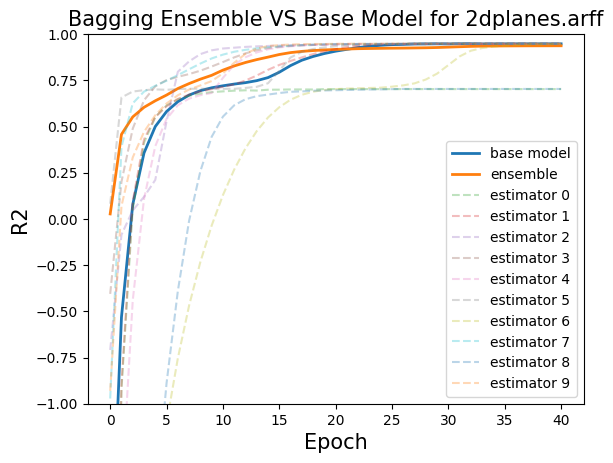

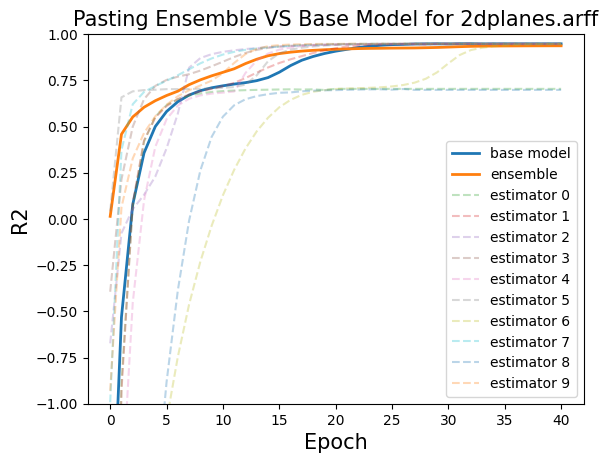

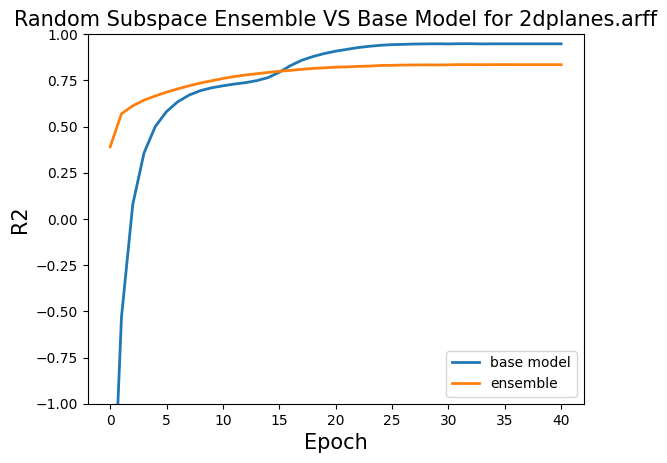

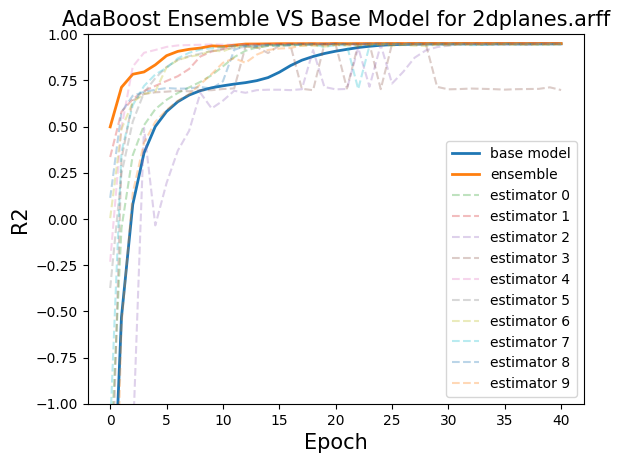

In [66]:
plot_many_graphs_1(base_model_test_scores[:data_1["Epoch"]], bagging_test_scores[:data_1["Epoch"]],bagging_estimators_score, f"Bagging Ensemble VS Base Model for {data_1['name']}", "R2", data_1["Epoch"])
plot_many_graphs_1(base_model_test_scores[:data_1["Epoch"]], pasting_test_scores[:data_1["Epoch"]],pasting_estimators_score, f"Pasting Ensemble VS Base Model for {data_1['name']}", "R2", data_1["Epoch"])
plot_many_graphs_1(base_model_test_scores[:data_1["Epoch"]], random_subspace_test_scores[:data_1["Epoch"]],random_subspace_estimators_score, f"Random Subspace Ensemble VS Base Model for {data_1['name']}", "R2", data_1["Epoch"])
plot_many_graphs_1(base_model_test_scores[:data_1["Epoch"]], adaboost_test_scores[:data_1["Epoch"]],adaboost_estimators_score, f"AdaBoost Ensemble VS Base Model for {data_1['name']}", "R2", data_1["Epoch"])


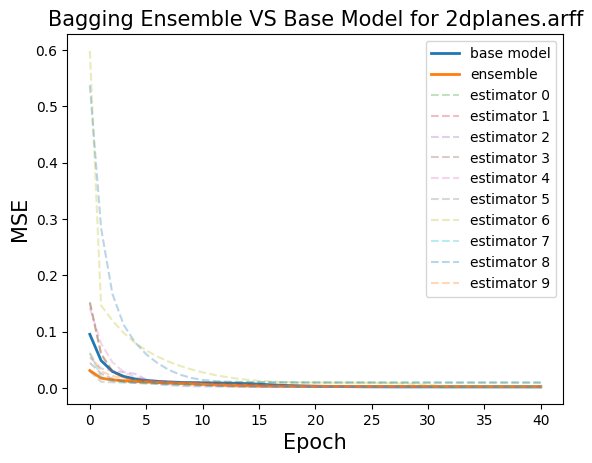

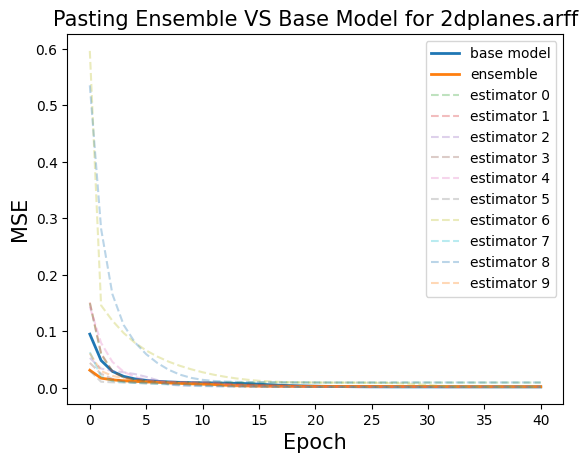

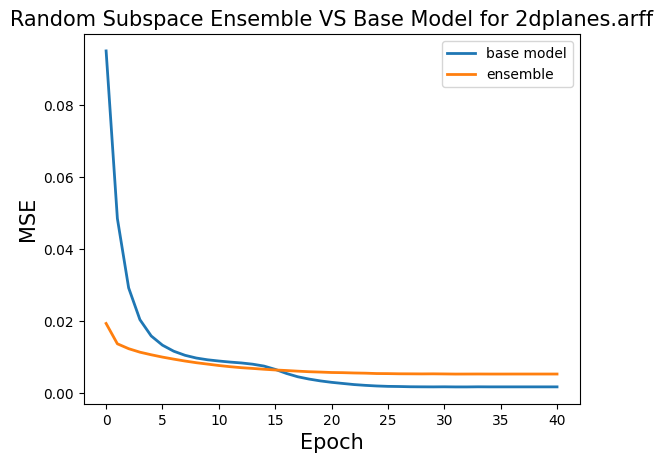

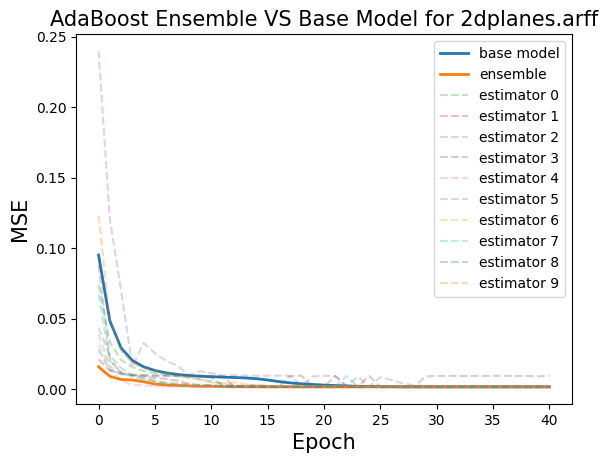

In [67]:
plot_many_graphs_1(base_model_test_losses[:data_1["Epoch"]], bagging_test_losses[:data_1["Epoch"]],bagging_estimators_loss, f"Bagging Ensemble VS Base Model for {data_1['name']}", "MSE", data_1["Epoch"])
plot_many_graphs_1(base_model_test_losses[:data_1["Epoch"]], pasting_test_losses[:data_1["Epoch"]],pasting_estimators_loss, f"Pasting Ensemble VS Base Model for {data_1['name']}", "MSE", data_1["Epoch"])
plot_many_graphs_1(base_model_test_losses[:data_1["Epoch"]], random_subspace_test_losses[:data_1["Epoch"]],random_subspace_estimators_loss, f"Random Subspace Ensemble VS Base Model for {data_1['name']}", "MSE", data_1["Epoch"])
plot_many_graphs_1(base_model_test_losses[:data_1["Epoch"]], adaboost_test_losses[:data_1["Epoch"]],adaboost_estimators_loss, f"AdaBoost Ensemble VS Base Model for {data_1['name']}", "MSE", data_1["Epoch"])


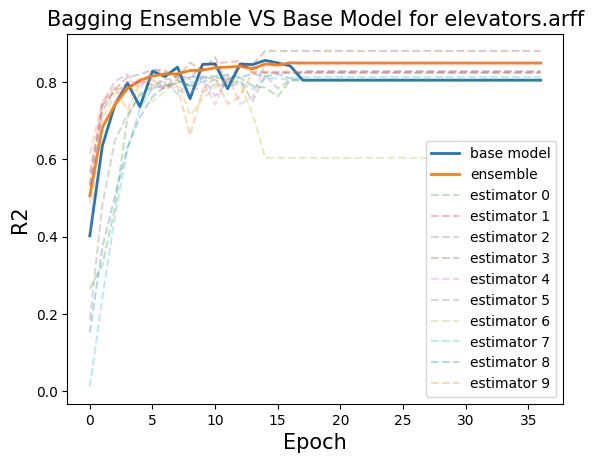

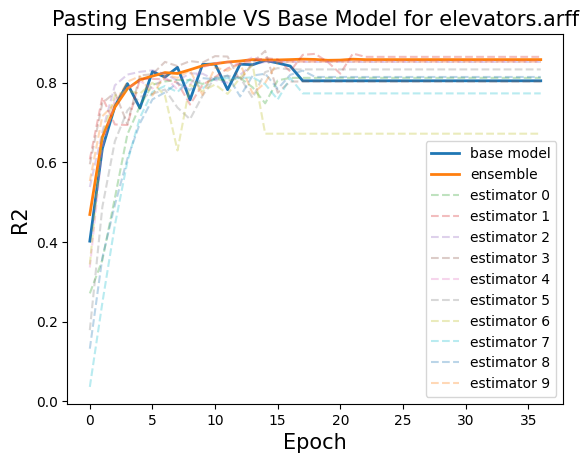

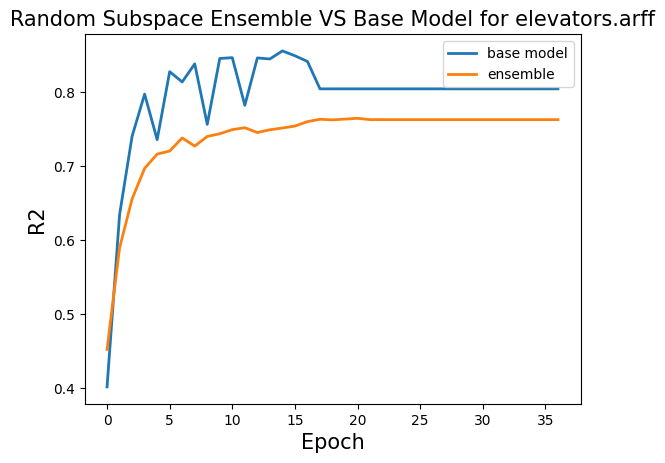

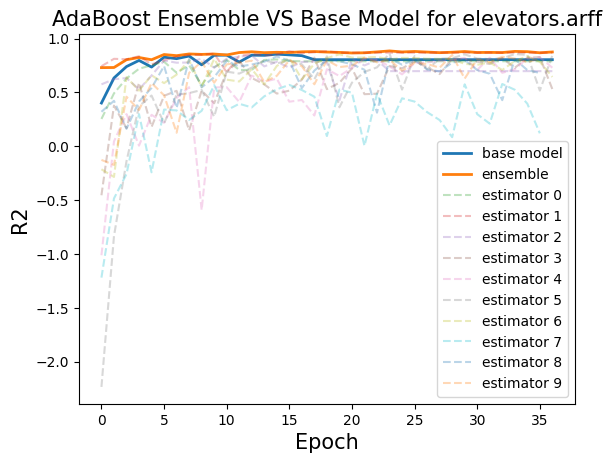

In [70]:
plot_many_graphs_2(base_model_test_scores[data_1["Epoch"]:], bagging_test_scores[data_1["Epoch"]:],bagging_estimators_score, f"Bagging Ensemble VS Base Model for {data_2['name']}", "R2", data_1["Epoch"])
plot_many_graphs_2(base_model_test_scores[data_1["Epoch"]:], pasting_test_scores[data_1["Epoch"]:],pasting_estimators_score, f"Pasting Ensemble VS Base Model for {data_2['name']}", "R2", data_1["Epoch"])
plot_many_graphs_2(base_model_test_scores[data_1["Epoch"]:], random_subspace_test_scores[data_1["Epoch"]:],random_subspace_estimators_score, f"Random Subspace Ensemble VS Base Model for {data_2['name']}", "R2", data_1["Epoch"])
plot_many_graphs_2(base_model_test_scores[data_1["Epoch"]:], adaboost_test_scores[data_1["Epoch"]:],adaboost_estimators_score, f"AdaBoost Ensemble VS Base Model for {data_2['name']}", "R2", data_1["Epoch"])


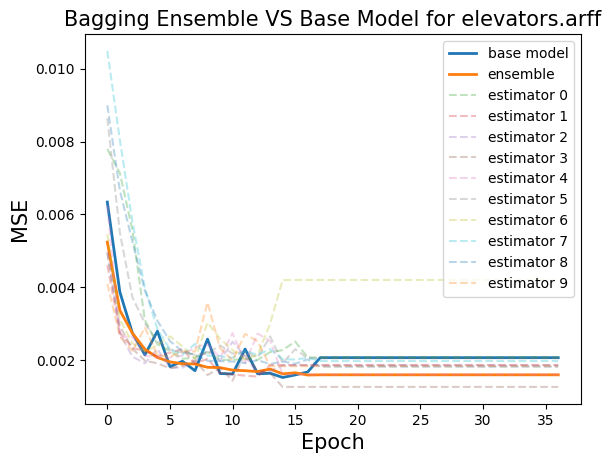

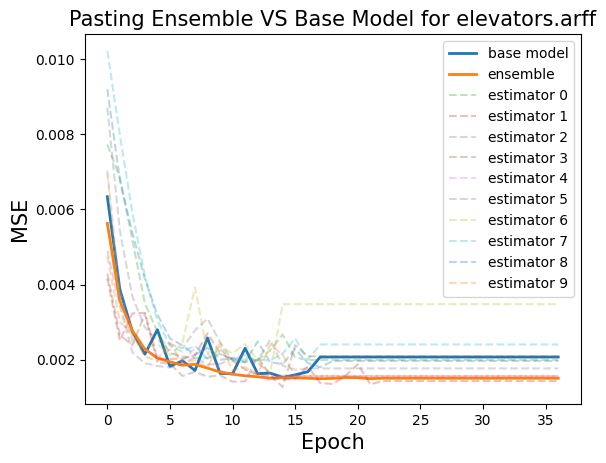

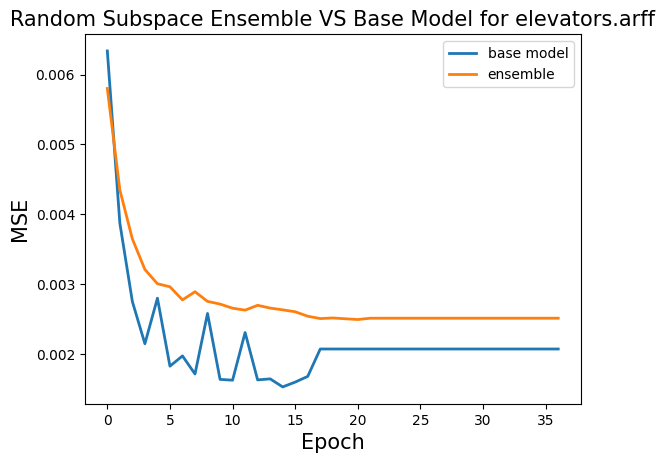

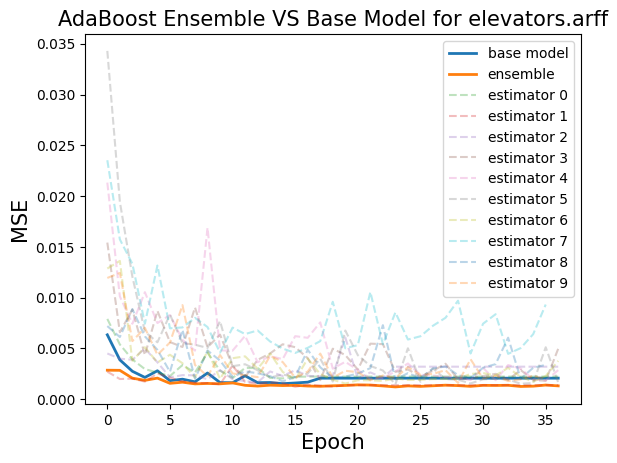

In [71]:
plot_many_graphs_2(base_model_test_losses[data_1["Epoch"]:], bagging_test_losses[data_1["Epoch"]:],bagging_estimators_loss, f"Bagging Ensemble VS Base Model for {data_2['name']}", "MSE", data_1["Epoch"])
plot_many_graphs_2(base_model_test_losses[data_1["Epoch"]:], pasting_test_losses[data_1["Epoch"]:],pasting_estimators_loss, f"Pasting Ensemble VS Base Model for {data_2['name']}", "MSE", data_1["Epoch"])
plot_many_graphs_2(base_model_test_losses[data_1["Epoch"]:], random_subspace_test_losses[data_1["Epoch"]:],random_subspace_estimators_loss, f"Random Subspace Ensemble VS Base Model for {data_2['name']}", "MSE", data_1["Epoch"])
plot_many_graphs_2(base_model_test_losses[data_1["Epoch"]:], adaboost_test_losses[data_1["Epoch"]:],adaboost_estimators_loss, f"AdaBoost Ensemble VS Base Model for {data_2['name']}", "MSE", data_1["Epoch"])